This jupyter notebook contains some of the codes and calculations associated with our recent paper: 

**"The VLT-MUSE and ALMA view of the MACS 1931.8-2635 brightest cluster galaxy"** 

Ciocan B. I. , Ziegler, B. L. , Verdugo, M. , Papaderos, P. , Fogarty, K. , Donahue, M. , and Postman, M.

### How to align MUSE datacubes with other observations using MPDAF

In [3]:
from mpdaf.obj import Cube, Image, WCS
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


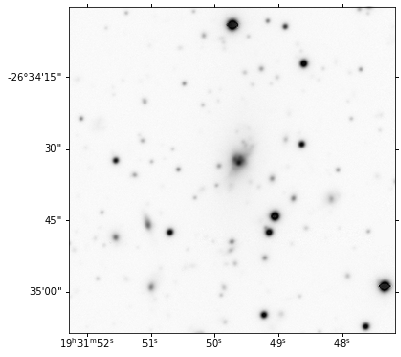

In [4]:
ref_img = Image("macs1931_subaru_rc.CUT.fits")
plt.figure(figsize=(6,6))
ref_img.plot(use_wcs=True, cmap="gray_r", scale='arcsinh')

In [5]:
filename = "FinalCube/DATACUBE_FINAL_stacked_pycombine.fits"
filename = os.path.join(path, filename)
cube = Cube(filename)
ima = cube.sum(axis=0)

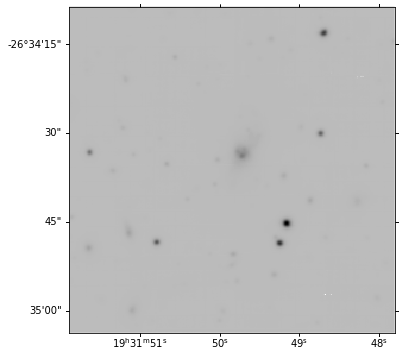

In [6]:
plt.figure(figsize=(6,6))
ima.plot(use_wcs=True, cmap="gray_r",scale='arcsinh')
ima.write(os.path.join(path,"FinalCube", "ImageFinal_mpdaf.fits"))

In [7]:
offset = ima.estimate_coordinate_offset(ref_img, nsigma=1)
print(offset)

ima_crpix1 = ima.wcs.get_crpix1() + offset[1]
ima_crpix2 = ima.wcs.get_crpix2() + offset[0]

print(ima_crpix1, ima_crpix2)


(-4.759774951359589, -6.347549910061929)
138.29520370697807 134.56065625038042


/home/mverdugo/anaconda/lib/python3.7/site-packages/mpdaf/obj/coords.py:1298: RuntimeWarning: cdelt will be ignored since cd is present
  self.wcs.wcs.cdelt = np.array([1.0, 1.0])


updating the headers using ``ima.wcs.set_crpix1`` produces unexpected results. All pixels below a certain level are set to 0!

Just use astropy for that

In [8]:
hdu = fits.open(os.path.join(path, "FinalCube", "ImageFinal_mpdaf.fits"))

hdu.info()
header1 = hdu[1].header
header2 = hdu[2].header

print(header1["CRPIX1"], header1["CRPIX2"],
      header2["CRPIX1"], header2["CRPIX2"])
      

Filename: /home/mverdugo/DATA/MACS1931/FinalCube/ImageFinal_mpdaf.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      47   ()      
  1  DATA          1 ImageHDU        29   (275, 275)   float32   
  2  STAT          1 ImageHDU        29   (275, 275)   float32   
144.64275361704 139.32043120174 144.64275361704 139.32043120174


In [9]:
# setting the headers and writing the new file

header1["CRPIX1"] = ima_crpix1
header1["CRPIX2"] = ima_crpix2
header2["CRPIX1"] = ima_crpix1
header2["CRPIX2"] = ima_crpix2

In [10]:
hdu.writeto(os.path.join(path, "FinalCube", "ImageFinal_corr.fits"), overwrite=True)
hdu.close()

## Now working with the cubes


In [11]:

filename = os.path.join(path, "FinalCube", "DATACUBE_FINAL_stacked_pycombine.fits")
fullcube = fits.open(filename)
fullcube.info()
header1 = fullcube[1].header
header2 = fullcube[2].header
header3 = fullcube[3].header

print(" data:", header1["CRPIX1"], header1["CRPIX2"], "\n",
      "stat:",header2["CRPIX1"], header2["CRPIX2"], "\n",
      "dq:", header3["CRPIX1"], header3["CRPIX2"])

Filename: /home/mverdugo/DATA/MACS1931/FinalCube/DATACUBE_FINAL_stacked_pycombine.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      47   ()      
  1  DATA          1 ImageHDU        39   (275, 275, 3681)   float32   
  2  STAT          1 ImageHDU        39   (275, 275, 3681)   float32   
  3  DQ            1 ImageHDU        38   (275, 275, 3681)   uint8   
 data: 144.64275361704 139.32043120174 
 stat: 144.64275361704 139.32043120174 
 dq: 144.64275361704 139.32043120174


In [12]:
# setting the headers and writing the new file

header1["CRPIX1"] = ima_crpix1
header1["CRPIX2"] = ima_crpix2
header2["CRPIX1"] = ima_crpix1
header2["CRPIX2"] = ima_crpix2
header3["CRPIX1"] = ima_crpix1
header3["CRPIX2"] = ima_crpix2

In [13]:
filename = os.path.join(path, "FinalCube", "DATACUBE_FINAL_stacked_corr.fits")
fullcube.writeto(os.path.join(filename), overwrite=True)
fullcube.close()

Test validity of the astrometric mismatch with *image_registration* package: *chi2_shift* by using:
<code>
from image_registration import chi2_shift"
Subaru_MUSE=chi2_shift(SUBARU,MUSE) # where SUBARU and MUSE are the images
print("offset is:", Subaru_MUSE)  
</code>